In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/healthy-lifestyle-cities-report-2021/healthy_lifestyle_city_2021.csv


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import pearsonr

In [3]:
hlc_data  = pd.read_csv('../input/healthy-lifestyle-cities-report-2021/healthy_lifestyle_city_2021.csv')
hlc_data .head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53


In [4]:
hlc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    44 non-null     object 
 1   Rank                                    44 non-null     int64  
 2   Sunshine hours(City)                    44 non-null     object 
 3   Cost of a bottle of water(City)         44 non-null     object 
 4   Obesity levels(Country)                 44 non-null     object 
 5   Life expectancy(years) (Country)        44 non-null     float64
 6   Pollution(Index score) (City)           44 non-null     object 
 7   Annual avg. hours worked                44 non-null     object 
 8   Happiness levels(Country)               44 non-null     float64
 9   Outdoor activities(City)                44 non-null     int64  
 10  Number of take out places(City)         44 non-null     int64  


In [5]:
hlc_data.columns

Index(['City', 'Rank', 'Sunshine hours(City)',
       'Cost of a bottle of water(City)', 'Obesity levels(Country)',
       'Life expectancy(years) (Country)', 'Pollution(Index score) (City)',
       'Annual avg. hours worked', 'Happiness levels(Country)',
       'Outdoor activities(City)', 'Number of take out places(City)',
       'Cost of a monthly gym membership(City)'],
      dtype='object')

In [6]:
print('The data frame has {} rows and {} columns'.format(hlc_data.shape[0], hlc_data.shape[1]))

The data frame has 44 rows and 12 columns


In [7]:
hlc_data.shape

(44, 12)

In [8]:
hlc_data.describe()

,Rank,Life expectancy(years) (Country),Happiness levels(Country),Outdoor activities(City),Number of take out places(City)
count,44.000000,44.00000,44.000000,44.000000,44.000000
mean,22.500000,78.17500,6.435000,213.977273,1443.113636
std,12.845233,5.30437,0.991202,127.190297,1388.803270
min,1.000000,56.30000,3.570000,23.000000,250.000000
25%,11.750000,75.40000,5.870000,125.250000,548.000000
50%,22.500000,80.40000,6.900000,189.500000,998.000000
75%,33.250000,81.80000,7.175000,288.250000,1674.250000
max,44.000000,83.20000,7.800000,585.000000,6417.000000


# Cleaning data
### If check the columns, there are 12 however, when describing only 4 shows up. The remaining data needs to be treated, removing special chacacters and turning data into integer or float. 




In [9]:
cleaned_hlc_data = hlc_data.copy()
#obe_hlc_data = hlc_data
cleaned_hlc_data['Obesity levels(Country)'] = cleaned_hlc_data['Obesity levels(Country)'].str.replace('%', '', regex=False)
cleaned_hlc_data['Obesity levels(Country)'] = cleaned_hlc_data['Obesity levels(Country)'].astype(str).astype(float)

#cost_hlc_data = hlc_data
cleaned_hlc_data['Cost of a bottle of water(City)'] = cleaned_hlc_data['Cost of a bottle of water(City)'].str.replace('£', '', regex=False)
cleaned_hlc_data['Cost of a bottle of water(City)'] = cleaned_hlc_data['Cost of a bottle of water(City)'].astype(str).astype(float)
 
cleaned_hlc_data['Cost of a monthly gym membership(City)'] = cleaned_hlc_data['Cost of a monthly gym membership(City)'].str.replace('£', '',regex=False)
cleaned_hlc_data['Cost of a monthly gym membership(City)'] = cleaned_hlc_data['Cost of a monthly gym membership(City)'].astype(str).astype(float)

In [10]:
cleaned_hlc_data.corr()

,Rank,Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
Rank,1.000000,-0.141420,0.197486,-0.320034,-0.231970,-0.076972,0.363058,0.272521
Cost of a bottle of water(City),-0.141420,1.000000,0.293047,0.612382,0.813159,-0.260297,-0.089963,0.356461
Obesity levels(Country),0.197486,0.293047,1.000000,0.091071,0.446399,0.150171,0.016833,-0.070904
Life expectancy(years) (Country),-0.320034,0.612382,0.091071,1.000000,0.724587,-0.044864,0.128163,0.417986
Happiness levels(Country),-0.231970,0.813159,0.446399,0.724587,1.000000,-0.137612,0.033116,0.297425
Outdoor activities(City),-0.076972,-0.260297,0.150171,-0.044864,-0.137612,1.000000,0.528200,-0.115400
Number of take out places(City),0.363058,-0.089963,0.016833,0.128163,0.033116,0.528200,1.000000,0.092610
Cost of a monthly gym membership(City),0.272521,0.356461,-0.070904,0.417986,0.297425,-0.115400,0.092610,1.000000


In [11]:
hours_hlc_data = cleaned_hlc_data.copy()
hours_hlc_data = hours_hlc_data[hours_hlc_data['Annual avg. hours worked'] != '-']

hours_hlc_data['Annual avg. hours worked'] = hours_hlc_data['Annual avg. hours worked'].astype(str).astype(int)
hours_hlc_data.corr()


,Rank,Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
Rank,1.000000,-0.156477,0.290423,-0.431469,0.498113,-0.308642,-0.037535,0.407923,0.406191
Cost of a bottle of water(City),-0.156477,1.000000,-0.004787,0.447720,-0.636100,0.766225,-0.366549,-0.275817,0.241377
Obesity levels(Country),0.290423,-0.004787,1.000000,-0.407865,0.265088,0.253585,0.138793,-0.100645,-0.117215
Life expectancy(years) (Country),-0.431469,0.447720,-0.407865,1.000000,-0.480859,0.407255,-0.167352,-0.043328,0.290493
Annual avg. hours worked,0.498113,-0.636100,0.265088,-0.480859,1.000000,-0.531554,0.083404,-0.035817,0.144633
Happiness levels(Country),-0.308642,0.766225,0.253585,0.407255,-0.531554,1.000000,-0.292265,-0.305360,0.082452
Outdoor activities(City),-0.037535,-0.366549,0.138793,-0.167352,0.083404,-0.292265,1.000000,0.588237,-0.197376
Number of take out places(City),0.407923,-0.275817,-0.100645,-0.043328,-0.035817,-0.305360,0.588237,1.000000,0.098211
Cost of a monthly gym membership(City),0.406191,0.241377,-0.117215,0.290493,0.144633,0.082452,-0.197376,0.098211,1.000000


In [12]:
for i in hours_hlc_data['Annual avg. hours worked']:
    print(i)

1434
1712
1501
1452
1380
1540
1644
1386
1686
1670
1712
1670
1686
1967
1386
1557
1898
1832
1779
1779
1772
1644
1779
1583
1779
1505
1557
1538
1718
1779
1779
1965
2137


In [13]:
sun_hlc_data = cleaned_hlc_data.copy()
sun_hlc_data = sun_hlc_data[sun_hlc_data['Sunshine hours(City)'] != '-']
sun_hlc_data['Sunshine hours(City)'] = sun_hlc_data['Sunshine hours(City)'].astype(str).astype(int)
sun_hlc_data.corr()

,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
Rank,1.000000,0.007940,-0.139029,0.196606,-0.318965,-0.230374,-0.085025,0.362126,0.295783
Sunshine hours(City),0.007940,1.000000,-0.348465,0.281304,-0.356351,-0.334141,0.129550,-0.211848,0.030697
Cost of a bottle of water(City),-0.139029,-0.348465,1.000000,0.320489,0.607240,0.810776,-0.211022,-0.058752,0.289369
Obesity levels(Country),0.196606,0.281304,0.320489,1.000000,0.096661,0.460237,0.145836,0.012849,-0.062760
Life expectancy(years) (Country),-0.318965,-0.356351,0.607240,0.096661,1.000000,0.719049,-0.018894,0.144531,0.401021
Happiness levels(Country),-0.230374,-0.334141,0.810776,0.460237,0.719049,1.000000,-0.105374,0.053702,0.260345
Outdoor activities(City),-0.085025,0.129550,-0.211022,0.145836,-0.018894,-0.105374,1.000000,0.519624,-0.056549
Number of take out places(City),0.362126,-0.211848,-0.058752,0.012849,0.144531,0.053702,0.519624,1.000000,0.133460
Cost of a monthly gym membership(City),0.295783,0.030697,0.289369,-0.062760,0.401021,0.260345,-0.056549,0.133460,1.000000


In [14]:
pol_hlc_data = cleaned_hlc_data.copy()
pol_hlc_data = pol_hlc_data[pol_hlc_data['Pollution(Index score) (City)'] != '-' ]
pol_hlc_data['Pollution(Index score) (City)'] = pol_hlc_data['Pollution(Index score) (City)'].astype(str).astype(float)
pol_hlc_data.corr()

,Rank,Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
Rank,1.000000,-0.160508,0.156132,-0.301275,0.427297,-0.253738,-0.122384,0.352271,0.311411
Cost of a bottle of water(City),-0.160508,1.000000,0.281698,0.633767,-0.735286,0.811766,-0.286457,-0.099299,0.375971
Obesity levels(Country),0.156132,0.281698,1.000000,0.136392,-0.256251,0.440548,0.098091,-0.010373,-0.030005
Life expectancy(years) (Country),-0.301275,0.633767,0.136392,1.000000,-0.558713,0.748339,-0.013609,0.145122,0.404191
Pollution(Index score) (City),0.427297,-0.735286,-0.256251,-0.558713,1.000000,-0.765902,0.242622,0.187227,-0.244865
Happiness levels(Country),-0.253738,0.811766,0.440548,0.748339,-0.765902,1.000000,-0.161151,0.024503,0.316620
Outdoor activities(City),-0.122384,-0.286457,0.098091,-0.013609,0.242622,-0.161151,1.000000,0.521406,-0.083967
Number of take out places(City),0.352271,-0.099299,-0.010373,0.145122,0.187227,0.024503,0.521406,1.000000,0.110514
Cost of a monthly gym membership(City),0.311411,0.375971,-0.030005,0.404191,-0.244865,0.316620,-0.083967,0.110514,1.000000


Perarsons correlation: 0.725


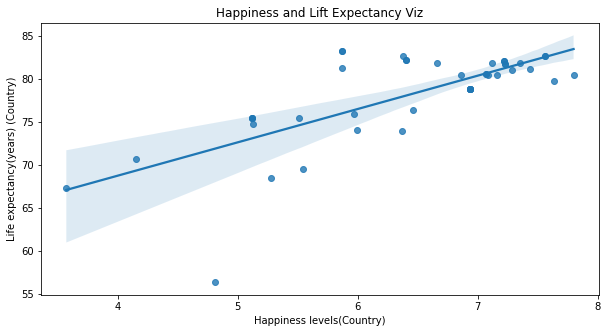

In [15]:
plt.figure(figsize = (10,5))
plt.xlabel('Hapinnes')
plt.ylabel('Life expectancy')
plt.title('Happiness and Lift Expectancy Viz')
sns.regplot(data=cleaned_hlc_data, x = 'Happiness levels(Country)', y = 'Life expectancy(years) (Country)')
correlation_coeficient, _ = pearsonr(cleaned_hlc_data['Happiness levels(Country)'], cleaned_hlc_data['Life expectancy(years) (Country)'])
print('Perarsons correlation: %.3f' % correlation_coeficient)

Pearsons correlation: -0.532


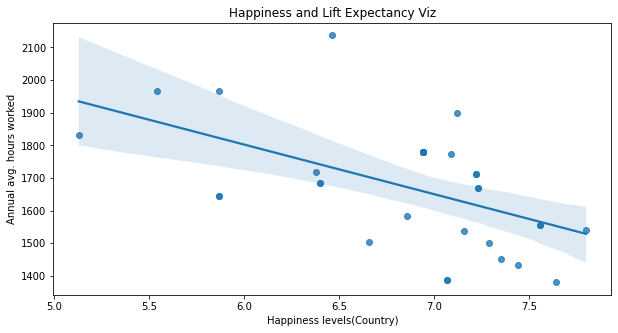

In [16]:
plt.figure(figsize = (10,5))
plt.xlabel('Hapinnes')
plt.ylabel('Annual avg. hours worked')
plt.title('Happiness and Lift Expectancy Viz')
sns.regplot(data=hours_hlc_data, x= 'Happiness levels(Country)', y='Annual avg. hours worked')
correlation_coeficient, _ = pearsonr(hours_hlc_data['Happiness levels(Country)'], hours_hlc_data['Annual avg. hours worked'])
print('Pearsons correlation: %.3f' % correlation_coeficient)

Pearsons correlation: -0.766


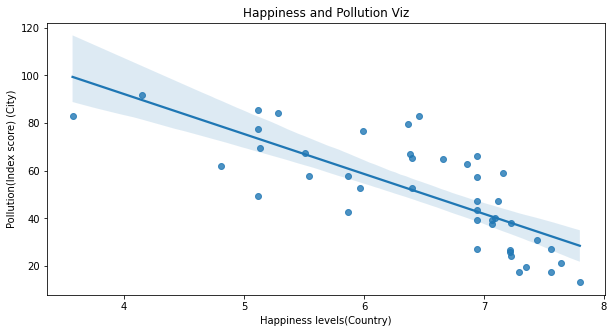

In [17]:
plt.figure(figsize = (10,5))
plt.xlabel('Happiness')
plt.ylabel('Pollution(Index Score)')
plt.title('Happiness and Pollution Viz')
sns.regplot(data=pol_hlc_data, x = 'Happiness levels(Country)', y = 'Pollution(Index score) (City)')
correlation_coeficient, _ = pearsonr(pol_hlc_data['Happiness levels(Country)'], pol_hlc_data['Pollution(Index score) (City)'])
print('Pearsons correlation: %.3f' % correlation_coeficient)

<AxesSubplot:title={'center':'Life Expactancy and Pollution Viz'}, xlabel='Life expectancy(years) (Country)', ylabel='Pollution(Index score) (City)'>

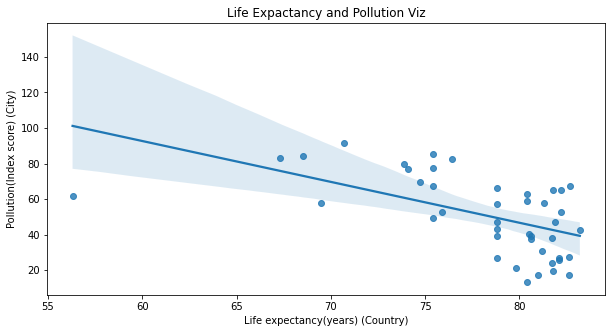

In [18]:
plt.figure(figsize = (10,5))
plt.xlabel('Life expactancy')
plt.ylabel('Pollution(Index Score)')
plt.title('Life Expactancy and Pollution Viz')
sns.regplot(data=pol_hlc_data, x = 'Life expectancy(years) (Country)', y = 'Pollution(Index score) (City)')

Pearsons correlation: -0.334


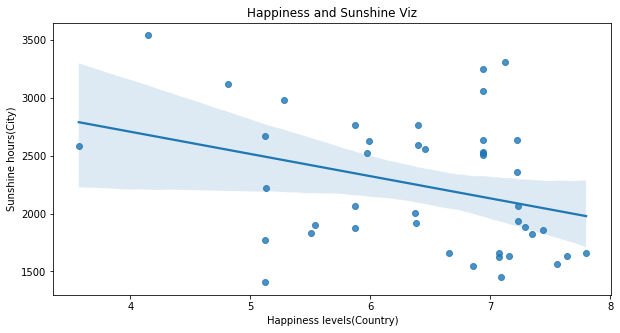

In [19]:
plt.figure(figsize = (10,5))
plt.xlabel('Happiness')
plt.ylabel('Sunshine')
plt.title('Happiness and Sunshine Viz')
sns.regplot(data=sun_hlc_data, x = 'Happiness levels(Country)', y = 'Sunshine hours(City)')
corr, _ = pearsonr(sun_hlc_data['Happiness levels(Country)'],sun_hlc_data['Sunshine hours(City)'])
print('Pearsons correlation: %.3f' % corr)